<a href="https://colab.research.google.com/github/vikpy/mtechdatascience_mlcourse/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Homework problem 
# Cats dataset
# Linear regression coefficients Body Weight vs Heart Weight for Male
# Linear regression coefficients Body Weight vs Heart Weight for Female
# Linear regression coefficients Body Weight vs Heart Weight for Male & Female 
# Logistic regression to identify the gender of the cat based on Body Wieght and Heart Weight
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

In [4]:
dataset = pd.read_csv("/content/cats.csv", index_col=0)
dataset.head(5)

,Sex,Bwt,Hwt
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3


In [36]:
# Checking for Null values 
dataset.isnull().sum()

Sex    0
Bwt    0
Hwt    0
dtype: int64

In [0]:
# Splitting the dataset into male and female
dataset_male = dataset[dataset["Sex"] == "M"]
dataset_female = dataset[dataset["Sex"] == "F"]

In [0]:
X = dataset.iloc[ : , 1].values
y = dataset.iloc[: ,  2].values
X_male = dataset_male.iloc[ : , 1].values
y_male = dataset_male.iloc[: , 2].values
X_female = dataset_female.iloc[ : , 1].values
y_female = dataset_female.iloc[: , 2].values
X_logistic = dataset.iloc[ : , [1,2]].values
y_logistic = dataset.iloc[ : , 0].values

In [0]:
# Linear Regression for first 3 hw problems 

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size = 1/5, random_state = 0)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size = 1/5, random_state = 0)

In [19]:
# Fitting the model using the training data
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
lm.fit(X_train.reshape(-1, 1), y_train)
lm_male = LinearRegression()
lm_male.fit(X_male_train.reshape(-1, 1), y_male_train)
lm_female = LinearRegression()
lm_female.fit(X_female_train.reshape(-1, 1), y_female_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = lm.predict(X_test.reshape(-1, 1))
y_male_pred = lm_male.predict(X_male_test.reshape(-1, 1))
y_female_pred = lm_female.predict(X_female_test.reshape(-1, 1))

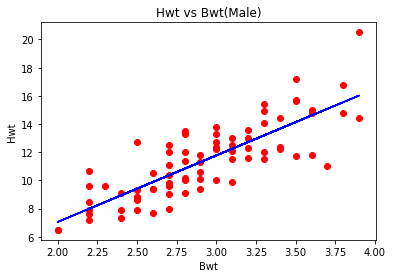

***************************************
Reg coefficient(Male):
[4.72369854]
***************************************
Reg Intercept(Male):
-2.398896910103616
***************************************
Mean Squared Error(Male):
2.47652342768079
***************************************


In [31]:
plt.scatter(X_male_train.reshape(-1,1), y_male_train, color = 'red')
plt.plot(X_male_train.reshape(-1,1), lm_male.predict(X_male_train.reshape(-1,1)), color='blue')
plt.title("Hwt vs Bwt(Male)")
plt.xlabel("Bwt")
plt.ylabel("Hwt")
plt.show()
print("***************************************")
print("Reg coefficient(Male):")
print(lm_male.coef_)
print("***************************************")
print("Reg Intercept(Male):")
print(lm_male.intercept_)
print("***************************************")
print("Mean Squared Error(Male):")
print(mean_squared_error(y_male_test, y_male_pred))
print("***************************************")

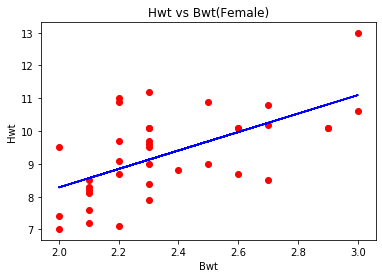

***************************************
Reg coefficient(Female):
[2.81510752]
***************************************
Reg Intercept(Female):
2.6512589597500487
***************************************
Mean Squared Error(Female):
2.028957037449837
***************************************


In [32]:
plt.scatter(X_female_train.reshape(-1,1), y_female_train, color = 'red')
plt.plot(X_female_train.reshape(-1,1), lm_female.predict(X_female_train.reshape(-1,1)), color='blue')
plt.title("Hwt vs Bwt(Female)")
plt.xlabel("Bwt")
plt.ylabel("Hwt")
plt.show()
print("***************************************")
print("Reg coefficient(Female):")
print(lm_female.coef_)
print("***************************************")
print("Reg Intercept(Female):")
print(lm_female.intercept_)
print("***************************************")
print("Mean Squared Error(Female):")
print(mean_squared_error(y_female_test, y_female_pred))
print("***************************************")

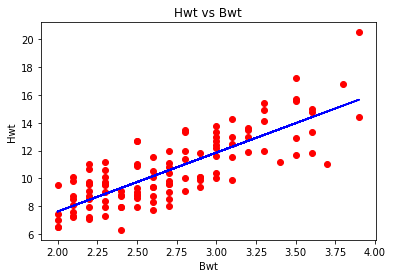

***************************************
Reg coefficient:
[4.2396017]
***************************************
Reg Intercept:
-0.870955574722263
***************************************
Mean Squared Error:
1.1279245231354464
***************************************


In [0]:
plt.scatter(X_train.reshape(-1,1), y_train, color = 'red')
plt.plot(X_train.reshape(-1,1), lm.predict(X_train.reshape(-1,1)), color='blue')
plt.title("Hwt vs Bwt")
plt.xlabel("Bwt")
plt.ylabel("Hwt")
plt.show()
print("***************************************")
print("Reg coefficient:")
print(lm.coef_)
print("***************************************")
print("Reg Intercept:")
print(lm.intercept_)
print("***************************************")
print("Mean Squared Error:")
print(mean_squared_error(y_test, y_pred))
print("***************************************")

In [38]:
# Logistic Regression 

# Level Encoding Male and Female 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
myLabelEncoder = LabelEncoder()
y_logistic  = myLabelEncoder.fit_transform(y_logistic)
y_logistic

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
X_logistic_train, X_logistic_test, y_logistic_train, y_logistic_test =  train_test_split(X_logistic,y_logistic, test_size = 0.20, random_state=5 )

In [0]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_logistic_train = sc.fit_transform(X_logistic_train)
X_logistic_test = sc.fit_transform(X_logistic_test)

In [51]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_logistic_train, y_logistic_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_logistic_pred = classifier.predict(X_logistic_test)

In [53]:
from sklearn.metrics import confusion_matrix 
cm  = confusion_matrix(y_logistic_test, y_logistic_pred)
cm

array([[ 5,  2],
       [ 7, 15]])